# Sheet 3

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import torch

In [3]:
### necessary import
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F

## 2 Projection Trick

(a)

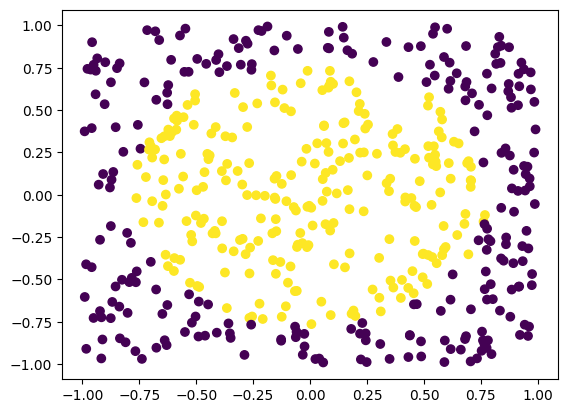

In [2]:
# Load the data
### path of the files: /content/data2d.npy
xy = np.load('/content/data2d.npy')
### labels file's path in colab: /content/labels.npy
labels = np.load('/content/labels.npy')

# TODO: Plot the data
plt.scatter(xy[:, 0], xy[:, 1], c=labels)
plt.show()

Mean accuracy:  0.558


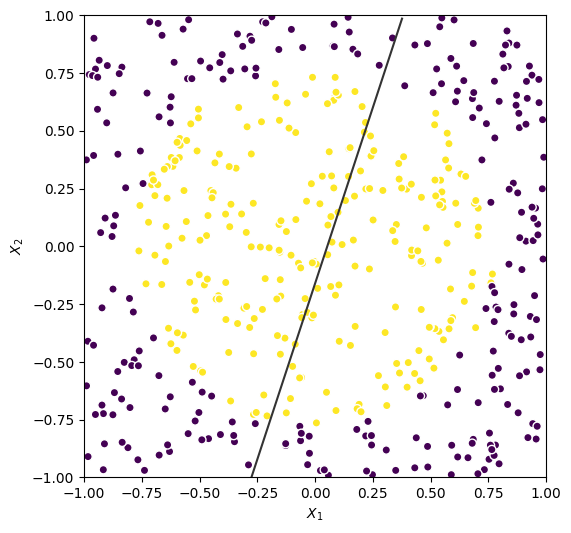

In [4]:
from sklearn.linear_model import LogisticRegression
# TODO: fit logistic regression]

LR = LogisticRegression().fit(xy, labels)
# TODO: compute the accuracy
print('Mean accuracy: ', LR.score(xy, labels))
#print(LR.predict(xy))
#print(LR.decision_function(xy))

# TODO: visualize the decision boundary
xx, yy = np.mgrid[-1:1:.01, -1:1:.01]
grid = np.c_[xx.ravel(), yy.ravel()]
probs = LR.predict_proba(grid)[:, 1].reshape(xx.shape)

f, ax = plt.subplots(figsize=(8, 6))
ax.contour(xx, yy, probs, levels=[.5], cmap="Greys", vmin=0, vmax=.6)

ax.scatter(xy[:,0], xy[:, 1], c=labels, edgecolor="white", linewidth=1)

ax.set(aspect="equal",
       xlim=(-1, 1), ylim=(-1, 1),
       xlabel="$X_1$", ylabel="$X_2$")
plt.show()

(b)

In [8]:
xy.shape

(500, 2)

In [18]:
a=np.array([[10,100],[20,200]])
b=a**2
print("b**2 is:");print(b)


b**2 is:
[[  100 10000]
 [  400 40000]]


In [27]:
c=b[:,0]+b[:,1]
print("c.shape:");print(c.shape)
c=c.reshape((len(c),1))
print("c.shape now:");print(c.shape)

new_data=np.concatenate((a,c),axis=1)
print("new_data");print(new_data)

c.shape:
(2,)
c.shape now:
(2, 1)
new_data
[[   10   100 10100]
 [   20   200 40400]]


xy[:2,:]
[[ 0.80248596 -0.61691649]
 [ 0.14800679  0.92759698]]
xy[:2,:]**2
[[0.64398372 0.38058596]
 [0.02190601 0.86043616]]
data after making the transformation:
[[ 0.80248596 -0.61691649  1.02456968]
 [ 0.14800679  0.92759698  0.88234217]]


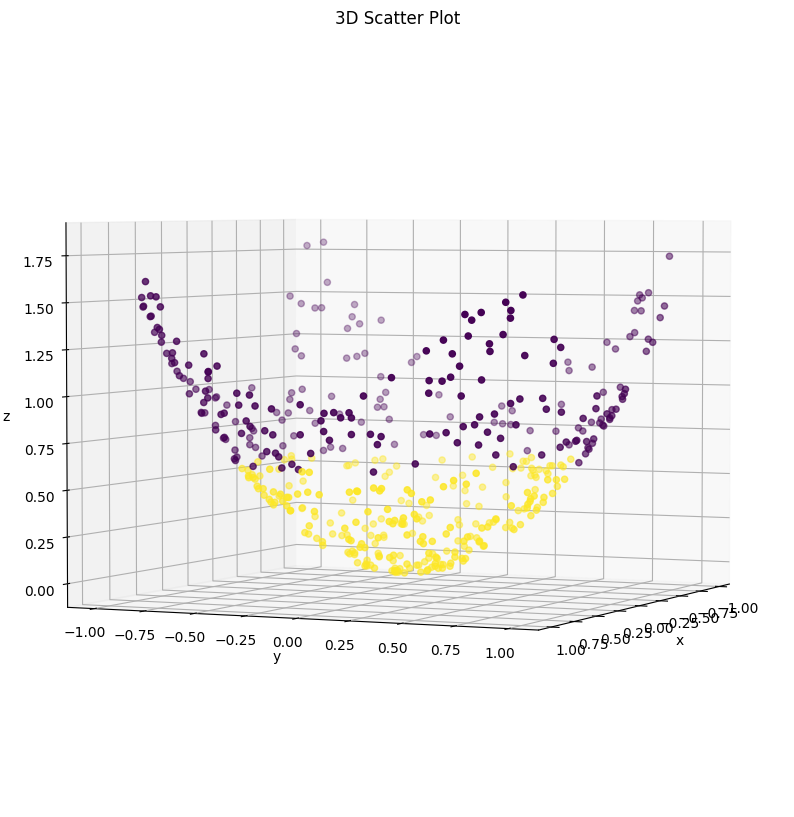

In [102]:
# TODO: Come up with a nonlinear tranformation for the third feature. Compute it and concatenate to the data.
z =(xy[:,0]**2+xy[:,1]**2)
z=z.reshape((len(z),1))

print("xy[:2,:]");print(xy[:2,:])
print("xy[:2,:]**2");print((xy**2)[:2,:])
#z = z.reshape((len(z),1))


data = np.concatenate((xy, z),axis=1)
print("data after making the transformation:"); print(data[:2,:])

### 3-D scatter plot
fig = plt.figure(figsize=(10,12))
ax = fig.add_subplot(111, projection='3d')
# ax.scatter(xy[:,0], xy[:,1], z, c='r', marker='o')
ax.scatter3D((xy)[:,0], (xy)[:,1], z, c=labels)

# Set labels for each axis
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')

# Set the title of the plot
ax.set_title('3D Scatter Plot')

# Adjust the view
ax.view_init(elev=3, azim=25)

# Show the plot
plt.show()

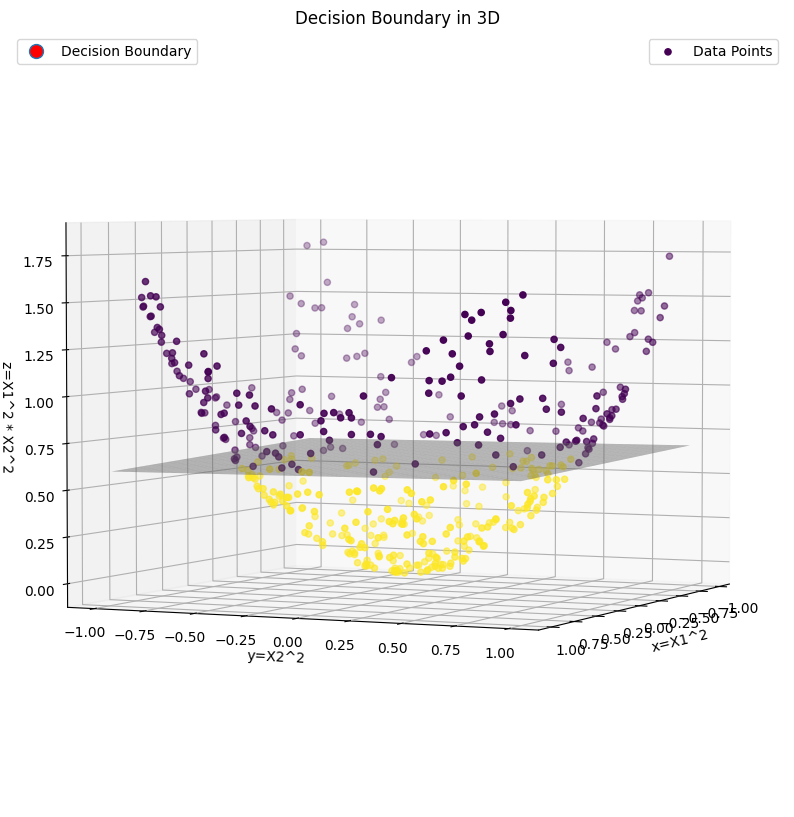

In [101]:
# TODO: again, fit and evaluate logistic regression
# Create a Logistic Regression model
model = LogisticRegression()

# Fit the model to the data
model.fit(data, labels)

# Get coefficients and intercept from the model
coef = model.coef_[0]
intercept = model.intercept_

# Plot the decision boundary in 3D
fig = plt.figure(figsize=(10,15))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(data[:, 0], data[:, 1], data[:, 2], c=labels, marker='o', label='Data Points')

# Define a meshgrid in the transformed space
xx, yy = np.meshgrid(np.linspace(data[:, 0].min(), data[:, 0].max(), 50),
                     np.linspace(data[:, 1].min(), data[:, 1].max(), 50))
zz = (-coef[0]*xx - coef[1]*yy - intercept) / coef[2]

# Plot the decision boundary
decision_boundary = ax.plot_surface(xx, yy, zz, alpha=0.5, color='gray')

# Create a legend for the scatter plot
legend1 = ax.legend([scatter], ['Data Points'])

# Create a legend for the decision boundary using a ProxyArtist
legend2 = ax.legend([plt.Line2D([0], [0], linestyle="none", marker='o', markersize=10, markerfacecolor='r')],
                    ['Decision Boundary'], loc='upper left')

# Add the second legend to the plot
ax.add_artist(legend1)

# Set labels
ax.set_xlabel('x=X1^2')
ax.set_ylabel('y=X2^2')
ax.set_zlabel('z=X1^2 * X2^2')
ax.set_title('Decision Boundary in 3D')

# Adjust the view
ax.view_init(elev=3, azim=25)

# Show the plot
plt.show()


# # Plot the decision boundary in 2D (original space)
# plt.scatter(xy[:, 0], xy[:, 1], c=labels, marker='o', label='Data Points')

# # Transform the decision boundary back to 2D space
# boundary_2d = (-coef[0]*xy[:, 0] - coef[1]*xy[:, 1] - intercept) / coef[2]

# # Plot the decision boundary
# plt.plot(xy[:, 0], boundary_2d, color='gray', label='Decision Boundary')

# # Set labels and legend
# plt.xlabel('X1')
# plt.ylabel('X2')
# plt.title('Decision Boundary in 2D')
# plt.legend()

# # Show the plot
# plt.show()

Answer (2-c) We can also use a single layer MLP to learn the data distribution. We would normally proceed as follows:

1. Input Layer: In the input layer, we have nodes corresponding to the features of our data. Since it's a 2D classification problem, we have two input nodes.

2. Hidden Layer: The hidden layer introduces non-linearity to the model. The number of nodes in this layer is a hyperparameter that we need to decide. A common approach is to start with a small number of nodes and then adjust based on performance.

3. Activation Function: We apply an activation function to the nodes in the hidden layer. Common choices include the sigmoid, tanh, or ReLU (Rectified Linear Unit) functions. The choice of the activation function depends on the nature of our problem.

4. Output Layer: The output layer has a single node for binary classification, as it seems to be the case here. The output is the predicted class label.

5. Loss Function: Since it is a  binary classification, we can simple use the binary cross-entropy as our loss function.

6. Training: We can train the MLP using an optimization algorithm like stochastic gradient descent (SGD). During training, the weights of the network are adjusted to minimize the loss function.

The MLP with a single hidden layer is capable of learning complex decision boundaries, and this allows us to handle problems that may not be linearly separable in the input space. The non-linear activation function in the hidden layer enables the model to capture intricate patterns in the data.

## 3) Linear regions of MLPs

(a)

In [ ]:
# TODO: define NN architecture
# defining a shalow model with one hidden layer:
shallow_model=nn.Sequential(
    nn.Linear(in_features=2,out_features=20),# I/P size=20, hidden_layer: 20
    nn.ReLU(),# RelU activation for the hidden layer
    nn.Linear(20,1)# O/P layer with one scaler output
)

In [ ]:
print(shallow_model)

Sequential(
  (0): Linear(in_features=2, out_features=20, bias=True)
  (1): ReLU()
  (2): Linear(in_features=20, out_features=1, bias=True)
)


In [ ]:
# Generate a dense grid of points
### creating two 1-D arrays representing the coordinates of the x and y axis.
x = np.linspace(-10, 10, 500)
y = np.linspace(-10, 10, 500)
###
xv, yv = np.meshgrid(x, y)

# # Plot the 2D grid
### to see what we did in this cell, change 500 above to some smaller value, say 30/50 and then plot it
# plt.scatter(xv, yv, marker='o')
# plt.title('2D Grid Created with np.meshgrid')
# plt.xlabel('X-axis')
# plt.ylabel('Y-axis')
# plt.show()

In [ ]:
points = np.column_stack((xv.flatten(), yv.flatten()))### creating a 2d numpy array
# each row of points corresponds to a pair of x-y coordinate matrices 'xv' and 'yv'
print("points is:");print(points)
print("shape of points is:");print(points.shape)
print("___________")

# Convert to PyTorch tensor
input_tensor = torch.tensor(points, dtype=torch.float32)
print("input tensor is:")
print(input_tensor)
print("shape of the input tensor:")
print(input_tensor.shape)

points is:
[[-10.         -10.        ]
 [ -9.95991984 -10.        ]
 [ -9.91983968 -10.        ]
 ...
 [  9.91983968  10.        ]
 [  9.95991984  10.        ]
 [ 10.          10.        ]]
shape of points is:
(250000, 2)
___________
input tensor is:
tensor([[-10.0000, -10.0000],
        [ -9.9599, -10.0000],
        [ -9.9198, -10.0000],
        ...,
        [  9.9198,  10.0000],
        [  9.9599,  10.0000],
        [ 10.0000,  10.0000]])
shape of the input tensor:
torch.Size([250000, 2])


In [ ]:
# Count the number of parameters in the model
num_params = sum(j.numel() for j in shallow_model.parameters())
print(f"Number of parameters in the model: {num_params}")

Number of parameters in the model: 81


shape of predictions before reshaping:
torch.Size([250000, 1])
shape of predictions after reshaping:
torch.Size([500, 500])


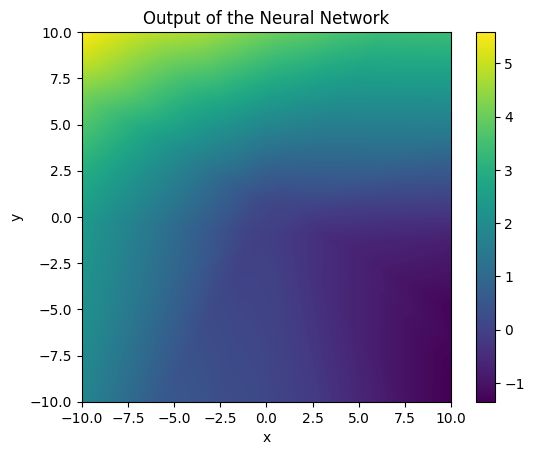

In [ ]:
# Forward pass to get the model predictions
# 'shallow_model(input_tensor)' performs a forward pass through the neural network
# using the generated grid of points as input.
# 'with torch.no_grad(): is used to prevent PyTorch from tracking operations for gradient computation during the forward pass.
# Since we're only interested in obtaining predictions and not in training, this can save memory.
with torch.no_grad():
    predictions = shallow_model(input_tensor)


print("shape of predictions before reshaping:")
print(predictions.shape)

# Reshape the predictions to match the grid
predictions = predictions.view(xv.shape)
print("shape of predictions after reshaping:")
print(predictions.shape)

# Visualize the output as an image
plt.imshow(predictions.numpy(), extent=(-10, 10, -10, 10), origin='lower', cmap='viridis')
plt.colorbar()
plt.title('Output of the Neural Network')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

Number of parameters in the model: 81
shape of predictions before reshaping:
torch.Size([250000, 1])
shape of predictions after reshaping:
torch.Size([500, 500])


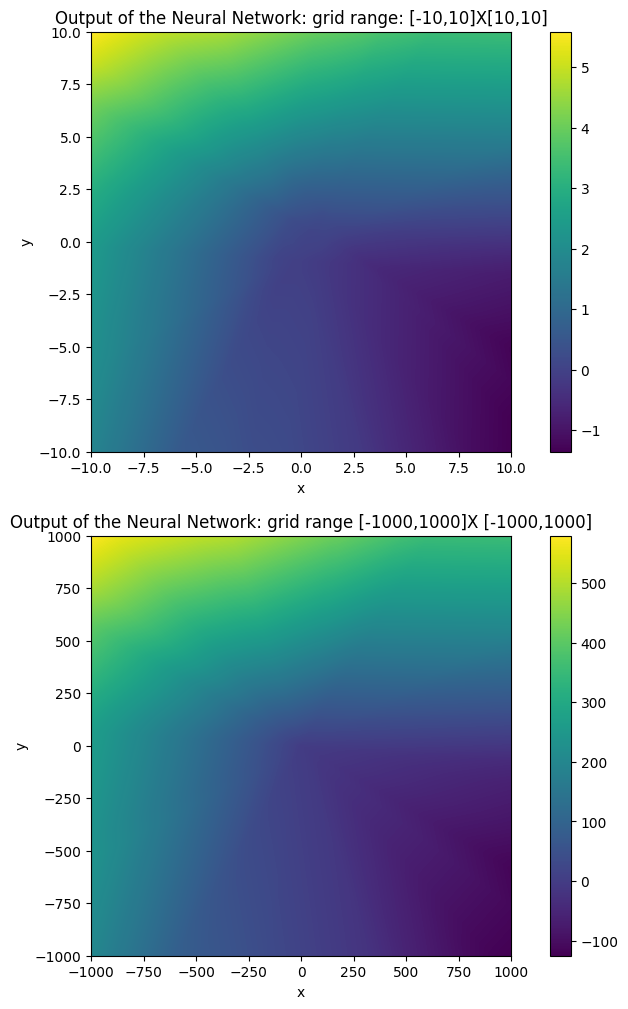

In [ ]:
# TODO: instantiate the model and make the visualizations as requested in the task
### REPEATING THE TASK 3(b) FOR A LARGER RANGE:
### creating two 1-D arrays representing the coordinates of the x and y axis.

extent2=1000### increasing the range
x2 = np.linspace(-extent2, extent2, 500)
y2 = np.linspace(-extent2, extent2, 500)
###
xv2, yv2 = np.meshgrid(x2, y2)

points2 = np.column_stack((xv2.flatten(), yv2.flatten()))### creating a 2d numpy array
# Convert to PyTorch tensor
input_tensor2 = torch.tensor(points2, dtype=torch.float32)

# Count the number of parameters in the model
num_params2 = sum(j.numel() for j in shallow_model.parameters())
print(f"Number of parameters in the model: {num_params2}")

with torch.no_grad():
    predictions2 = shallow_model(input_tensor2)


print("shape of predictions before reshaping:")
print(predictions2.shape)

# Reshape the predictions to match the grid
predictions2 = predictions2.view(xv2.shape)
print("shape of predictions after reshaping:")
print(predictions2.shape)

# Visualize the output as an image
plt.figure(figsize=(10,12))

plt.subplot(2,1,1)
plt.imshow(predictions.numpy(), extent=(-10, 10, -10, 10), origin='lower', cmap='viridis')
plt.colorbar()
plt.title('Output of the Neural Network: grid range: [-10,10]X[10,10]')
plt.xlabel('x')
plt.ylabel('y')

plt.subplot(2,1,2)
plt.imshow(predictions2.numpy(), extent=(-extent2, extent2, -extent2, extent2), origin='lower', cmap='viridis')
plt.colorbar()
plt.title(f'Output of the Neural Network: grid range [{-extent2},{extent2}]X [{-extent2},{extent2}]')
plt.xlabel('x')
plt.ylabel('y')



plt.show()



(c)

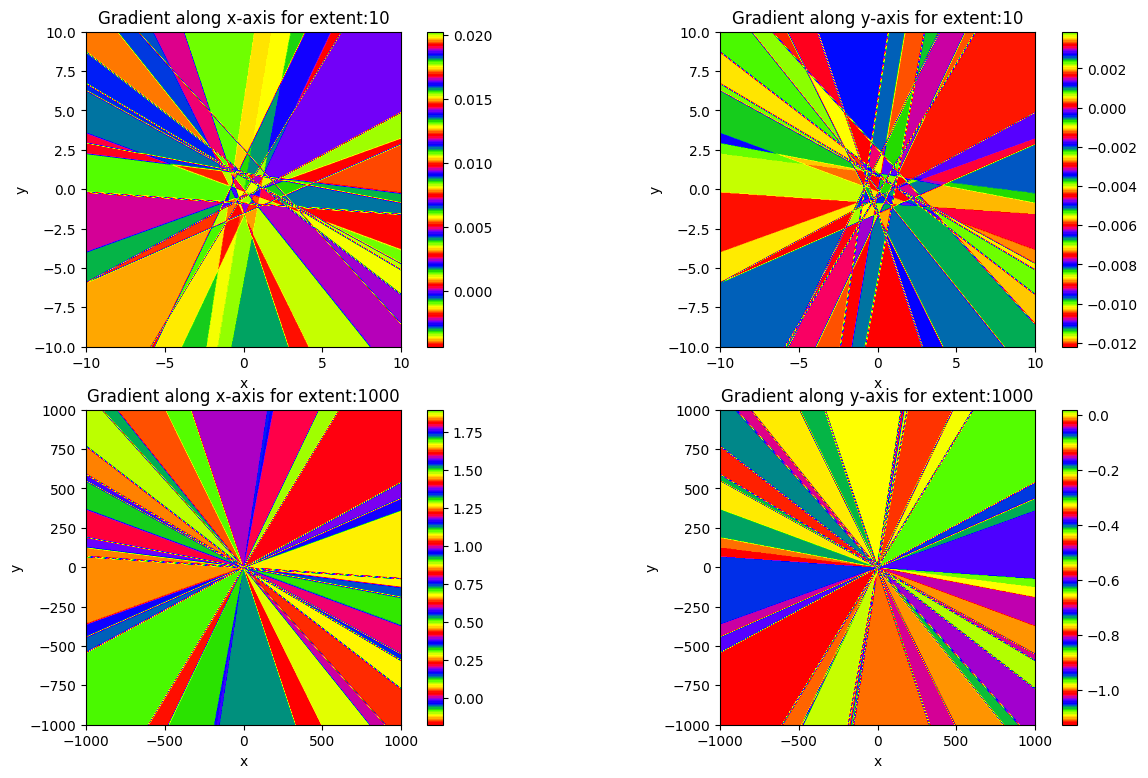

In [ ]:
# TODO: instantiate the model and make the visualizations as requested in the task

# Compute the spatial gradient using numpy.gradient
grad_x, grad_y = np.gradient(predictions)
grad_x2,grad_y2=np.gradient(predictions2)

# Visualize the components of the gradient
fig, axes = plt.subplots(2, 2, figsize=(15, 9))


# Plot the gradient along the x-axis
img0 = axes[0, 0].imshow(grad_x, extent=(-10, 10, -10, 10), origin='lower', cmap='prism')
axes[0, 0].set_title('Gradient along x-axis for extent:10')
axes[0, 0].set_xlabel('x')
axes[0, 0].set_ylabel('y')
plt.colorbar(img0, ax=axes[0, 0])

# Plot the gradient along the y-axis
img1 = axes[0, 1].imshow(grad_y, extent=(-10, 10, -10, 10), origin='lower', cmap='prism')
axes[0, 1].set_title('Gradient along y-axis for extent:10')
axes[0, 1].set_xlabel('x')
axes[0, 1].set_ylabel('y')
plt.colorbar(img1, ax=axes[0, 1])

### extent-2
img2 = axes[1, 0].imshow(grad_x2, extent=(-extent2, extent2, -extent2, extent2), origin='lower', cmap='prism')
axes[1, 0].set_title(f'Gradient along x-axis for extent:{extent2}')
axes[1, 0].set_xlabel('x')
axes[1, 0].set_ylabel('y')
plt.colorbar(img2, ax=axes[1, 0])

# Plot the gradient along the y-axis
img3 = axes[1, 1].imshow(grad_y2, extent=(-extent2, extent2, -extent2, extent2), origin='lower', cmap='prism')
axes[1, 1].set_title(f'Gradient along y-axis for extent:{extent2}')
axes[1, 1].set_xlabel('x')
axes[1, 1].set_ylabel('y')
plt.colorbar(img3, ax=axes[1, 1])

plt.show()

## 3-(d): Deeper model with 4 hidden layers with 5 neurons each

In [ ]:
# TODO: define NN architecture
# Define the deeper model with four hidden layers
deeper_model = nn.Sequential(
    nn.Linear(2, 5),
    nn.ReLU(),
    nn.Linear(5, 5),
    nn.ReLU(),
    nn.Linear(5, 5),
    nn.ReLU(),
    nn.Linear(5, 5),
    nn.ReLU(),
    nn.Linear(5, 1)
)

# Count the number of parameters in the model
num_params = sum(j.numel() for j in deeper_model.parameters())
print(f"Number of parameters in the model: {num_params}")

Number of parameters in the model: 111


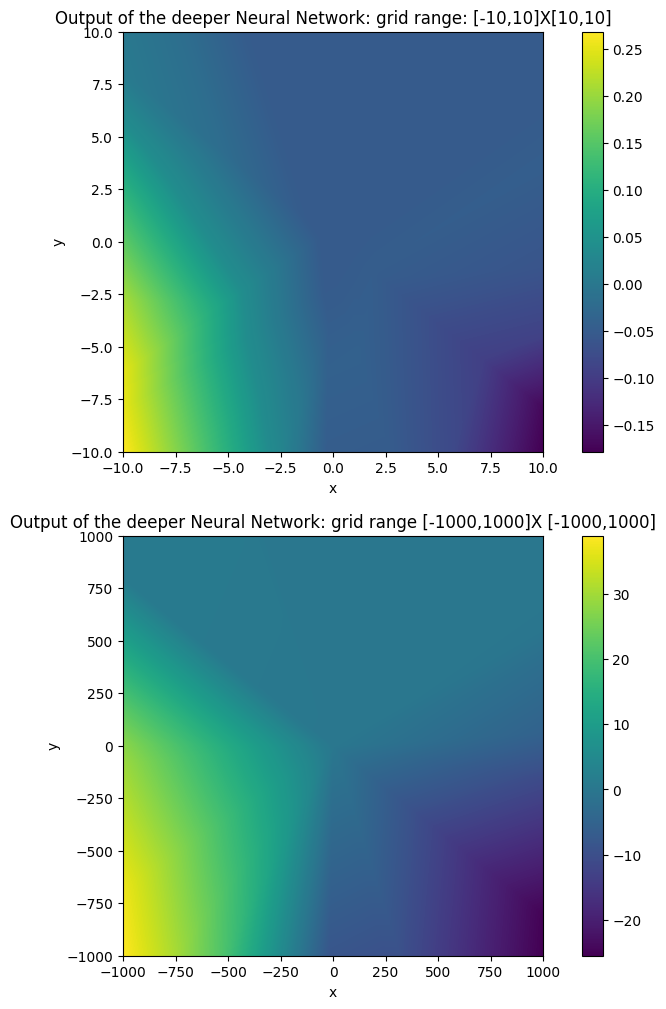

In [ ]:
# TODO: instantiate the model and make the visualizations as requested in the task

# Generate a dense grid of points
# Forward pass to get the model predictions for the deeper model
with torch.no_grad():
    deeper_predictions = deeper_model(input_tensor)
    deeper_predictions2= deeper_model(input_tensor2)

# Reshape the predictions to match the grid
deeper_predictions = deeper_predictions.view(xv.shape)
deeper_predictions2=deeper_predictions2.view(xv2.shape)

#extent=10
######
# Visualize the output as an image
plt.figure(figsize=(10,12))
plt.subplot(2,1,1)
plt.imshow(deeper_predictions.numpy(), extent=(-10, 10, -10, 10), origin='lower', cmap='viridis')
plt.colorbar()
plt.title('Output of the deeper Neural Network: grid range: [-10,10]X[10,10]')
plt.xlabel('x')
plt.ylabel('y')


plt.subplot(2,1,2)
plt.imshow(deeper_predictions2.numpy(), extent=(-extent2, extent2, -extent2, extent2), origin='lower', cmap='viridis')
plt.colorbar()
plt.title(f'Output of the deeper Neural Network: grid range [{-extent2},{extent2}]X [{-extent2},{extent2}]')
plt.xlabel('x')
plt.ylabel('y')
plt.show()




# ######

# plt.colorbar()
# plt.title('Output of the Deeper Neural Network')
# plt.xlabel('x')
# plt.ylabel('y')
# plt.show()


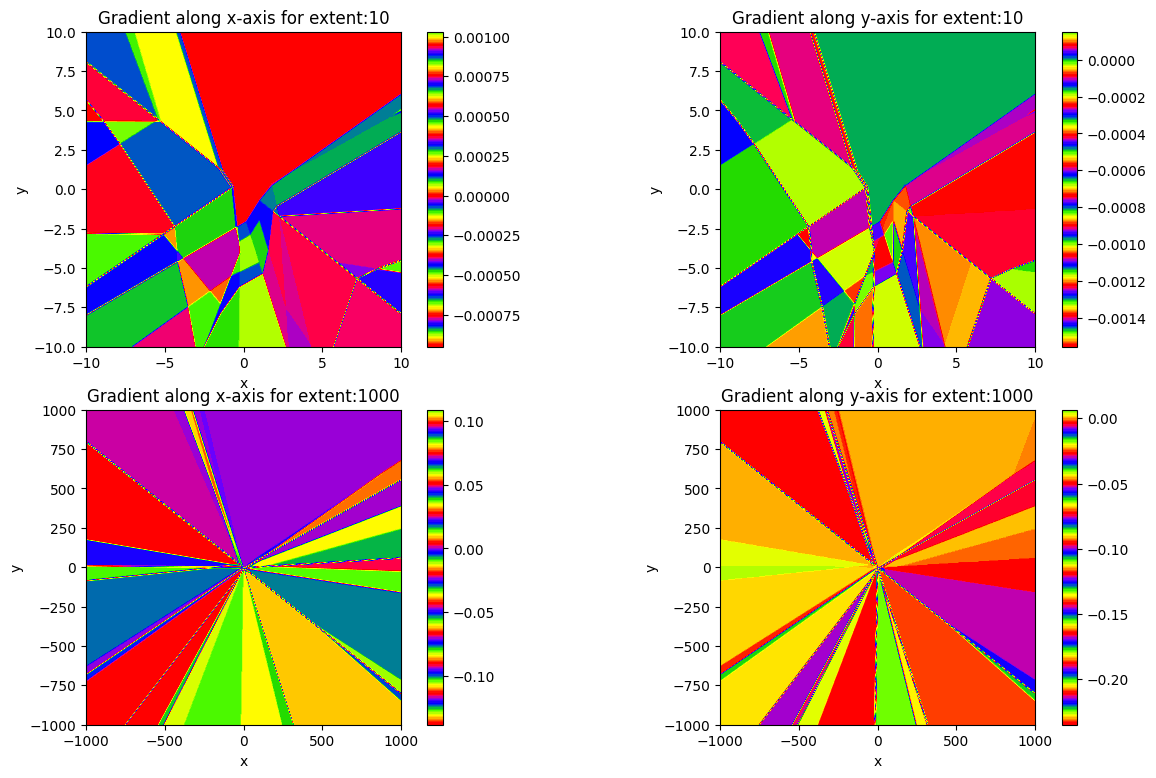

In [ ]:
# Compute the spatial gradient using numpy.gradient
grad_x, grad_y = np.gradient(deeper_predictions)
grad_x2,grad_y2=np.gradient(deeper_predictions2)

# Visualize the components of the gradient
fig, axes = plt.subplots(2, 2, figsize=(15, 9))


# Plot the gradient along the x-axis
img0 = axes[0, 0].imshow(grad_x, extent=(-10, 10, -10, 10), origin='lower', cmap='prism')
axes[0, 0].set_title('Gradient along x-axis for extent:10')
axes[0, 0].set_xlabel('x')
axes[0, 0].set_ylabel('y')
plt.colorbar(img0, ax=axes[0, 0])

# Plot the gradient along the y-axis
img1 = axes[0, 1].imshow(grad_y, extent=(-10, 10, -10, 10), origin='lower', cmap='prism')
axes[0, 1].set_title('Gradient along y-axis for extent:10')
axes[0, 1].set_xlabel('x')
axes[0, 1].set_ylabel('y')
plt.colorbar(img1, ax=axes[0, 1])

### extent-2
img2 = axes[1, 0].imshow(grad_x2, extent=(-extent2, extent2, -extent2, extent2), origin='lower', cmap='prism')
axes[1, 0].set_title(f'Gradient along x-axis for extent:{extent2}')
axes[1, 0].set_xlabel('x')
axes[1, 0].set_ylabel('y')
plt.colorbar(img2, ax=axes[1, 0])

# Plot the gradient along the y-axis
img3 = axes[1, 1].imshow(grad_y2, extent=(-extent2, extent2, -extent2, extent2), origin='lower', cmap='prism')
axes[1, 1].set_title(f'Gradient along y-axis for extent:{extent2}')
axes[1, 1].set_xlabel('x')
axes[1, 1].set_ylabel('y')
plt.colorbar(img3, ax=axes[1, 1])

plt.show()